In [1]:
using TaskGraphs
using DataFrames, CSV, Query, Statistics
using PGFPlots
using TikzPictures
tikzCommand("pdflatex")

In [2]:
data_path = joinpath(dirname(pathof(TaskGraphs)),"..","test","profiling")

"/home/kylebrown/.julia/dev/TaskGraphs/src/../test/profiling"

In [3]:
filename = joinpath(data_path, "MILP_profiling.csv")
df = CSV.read(filename);

In [4]:
N = sort(collect(Set{Int}(df[:N])))
M = sort(collect(Set{Int}(df[:M])))
max_parents = sort(collect(Set{Int}(df[:max_parents])))
depth_bias = sort(collect(Set(df[:depth_bias])))
# termination_status = sort(collect(Set{Int}(df[:termination_status])));

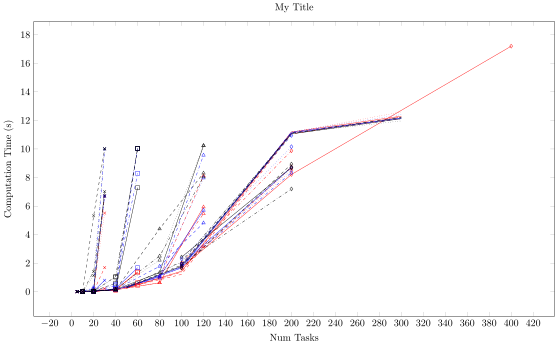

In [5]:
ax = Axis(xlabel="Num Tasks", ylabel="Computation Time (s)", title="My Title", 
    width="20cm", height="12cm")
for (mp,linecolor) in zip(max_parents,["red","blue","black"])
    for (db,linestyle) in zip(depth_bias,["solid","dashed","dash dot","dotted"])
        for (n,mark) in zip(N,["x","square","triangle","circle","diamond"])
            q0 = df |>
                @filter(_.N == n) |>
                @filter(_.max_parents == mp) |> 
                @filter(_.depth_bias == db) |>
                DataFrame
            q1 = q0 |>
                @groupby(_.M) |>
                @map({M=key(_), solve_time=mean(_.solve_time)}) |>
                DataFrame
            push!(ax, 
                Plots.Linear(
                    Vector{Int}(q1.M), 
                    Vector{Float64}(q1.solve_time), 
                    mark=mark,
                    style=string("mark options={style=solid, fill=",linecolor,"}, ",linecolor,",",linestyle,),
#                     onlyMarks=true,
                    # legendentry=string("n = ",n)
                )
            )
        end
    end
end
ax